In [1]:
import os
import plaid
import requests
from datetime import datetime, timedelta
import json
import pandas as pd
from dotenv import load_dotenv
%matplotlib inline
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
def pretty_print_response(response):
    """
    This function formats a JSON file to pretty printing it in the screen.
    """
    print(json.dumps(response, indent=4, sort_keys=True))

In [3]:
load_dotenv()

True

In [4]:
PLAID_CLIENT_ID = os.getenv("PLAID_CLIENT_ID")
PLAID_SECRET = os.getenv("PLAID_SECRET")
PLAID_PUBLIC_KEY = os.getenv("PLAID_PUBLIC_KEY")
client = plaid.Client(PLAID_CLIENT_ID, 
                      PLAID_SECRET, 
                      environment="sandbox", 
                     )
INSITUTION_ID = "ins_109508"
token_response = client.Sandbox.public_token.create(INSITUTION_ID, ["transactions", "income", "assets"])
exchange_response = client.Item.public_token.exchange(token_response['public_token'])
access_token = exchange_response["access_token"]
accounts = client.Accounts.get(access_token)
start_date = "{:%Y-%m-%d}".format(datetime.now() - timedelta(90))
end_date = "{:%Y-%m-%d}".format(datetime.now())
transaction = client.Transactions.get(access_token,start_date,end_date)
transactions_json = json.dumps(transaction["transactions"][:],indent=4, sort_keys=True)

In [5]:
# Create a for-loop to print the categories for each transaction
for n in transaction["transactions"][:]:
    print(n["category"])


['Transfer', 'Credit']
['Travel', 'Airlines and Aviation Services']
['Travel', 'Taxi']
['Food and Drink', 'Restaurants']
['Payment']
['Food and Drink', 'Restaurants', 'Fast Food']
['Shops', 'Sporting Goods']
['Payment', 'Credit Card']
['Travel', 'Taxi']
['Transfer', 'Debit']
['Transfer', 'Deposit']
['Recreation', 'Gyms and Fitness Centers']
['Travel', 'Airlines and Aviation Services']
['Food and Drink', 'Restaurants', 'Fast Food']
['Food and Drink', 'Restaurants', 'Coffee Shop']
['Food and Drink', 'Restaurants']


In [6]:
important_stuff = pd.DataFrame()
names = []
amount = []
date = []
category = [] 
for n in transaction["transactions"]:
    names.append(n["name"])
    amount.append(n["amount"])
    date.append(n["date"])
    category.append(n["category"][0])

In [7]:
important_stuff["Name"]=names
important_stuff["Amount"]=amount
important_stuff["Date"]=date
important_stuff["Category"]=category

In [8]:
important_stuff = important_stuff.set_index("Date")

In [9]:
income = client.Income.get(access_token)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000026331774948>],
      dtype=object)

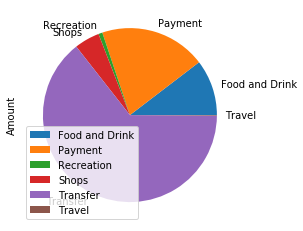

In [10]:
monthly_income = income["income"]["income_streams"][0]["monthly_income"]
gross_income = income["income"]["income_streams"]
projected_yearly_income = income["income"]["projected_yearly_income"]
spending_cat = important_stuff[["Amount", "Category"]].groupby("Category").sum()
spending_cat.plot.pie(subplots=True)
